In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [124]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_network, plt_roast

In [126]:
X,Y = load_coffee_data()
print(f'{X.shape}, {Y.shape}')

(200, 2), (200, 1)


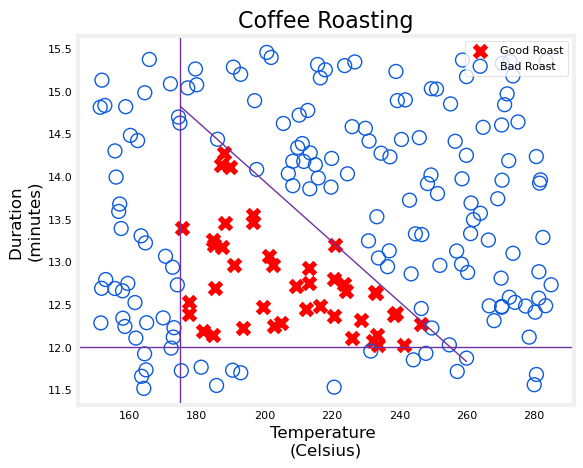

In [127]:
plt_roast(X,Y)

In [129]:
print(f'Temperature max, min pre-normalization: {np.max(X[:,0])}, {np.min(X[:,0])}')
print(f'Temperature max, min pre-normalization: {np.max(X[:,1])}, {np.min(X[:,1])}')
norm_l = tf.keras.layers.Normalization(axis = -1)
norm_l.adapt(X)
Xn = norm_l(X)
print(f'Temperature max, min post-normalization: {np.max(Xn[:,1])}, {np.min(Xn[:,1])}')
print(f'Temperature max, min post-normalization: {np.max(Xn[:,1])}, {np.min(Xn[:,1])}')


Temperature max, min pre-normalization: 284.99434167453603, 151.32372212128612
Temperature max, min pre-normalization: 15.454206928801511, 11.512747082472469
Temperature max, min post-normalization: 1.793238878250122, -1.6996712684631348
Temperature max, min post-normalization: 1.793238878250122, -1.6996712684631348


In [169]:
g = sigmoid

In [170]:
def my_dense(a_in, W, b):
    units = W.shape[1] 
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w ,a_in) + b[j]
        a_out[j] = g(z)
    return (a_out)

In [173]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    return (a2)

In [175]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [177]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return p

In [179]:
xtst = np.array([[200,13.9],[200,17]])
xtstn = norm_l(xtst)
predictions = my_predict(xtstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [181]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [183]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


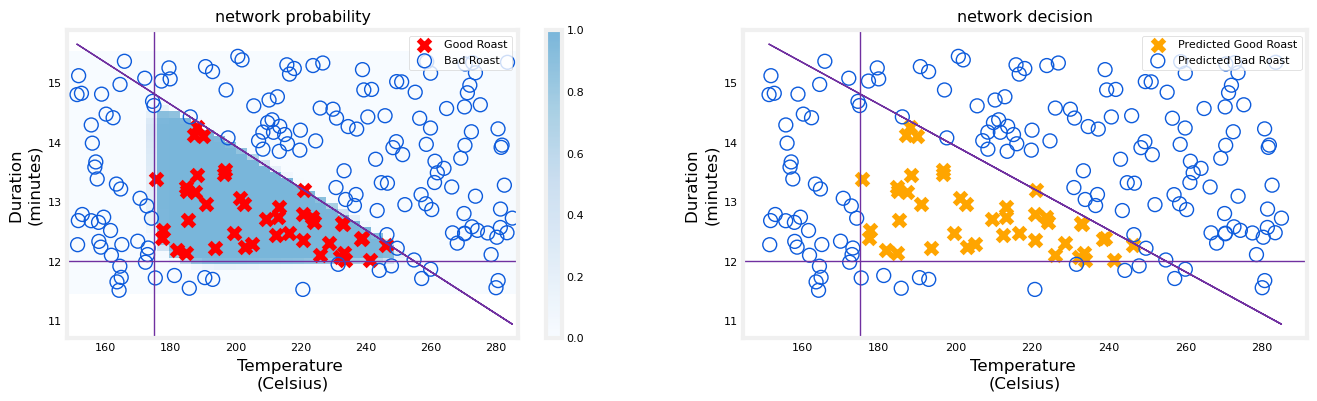

In [188]:
netf = lambda x : my_predict(norm_l(x), W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X, Y, netf)